The goal of this data entry project is to extract data from **pdfs and images** and save them into a **.xlsx file** using  python . This jupyter notebook will contain a snapshot of the written code as well as the results. 

Name : `´Mugabi Enock Mugisha`´

email : `´memugisha@outlook.com`´

profession: Data Analyst/Machine Learning Engineer

In [1]:
from IPython.display import Image # library for displaying pictures 
import PyPDF2 # pdf library 
import pandas as pd # pandas series used in Data Manipulation
import re # Library that handle expressions . 

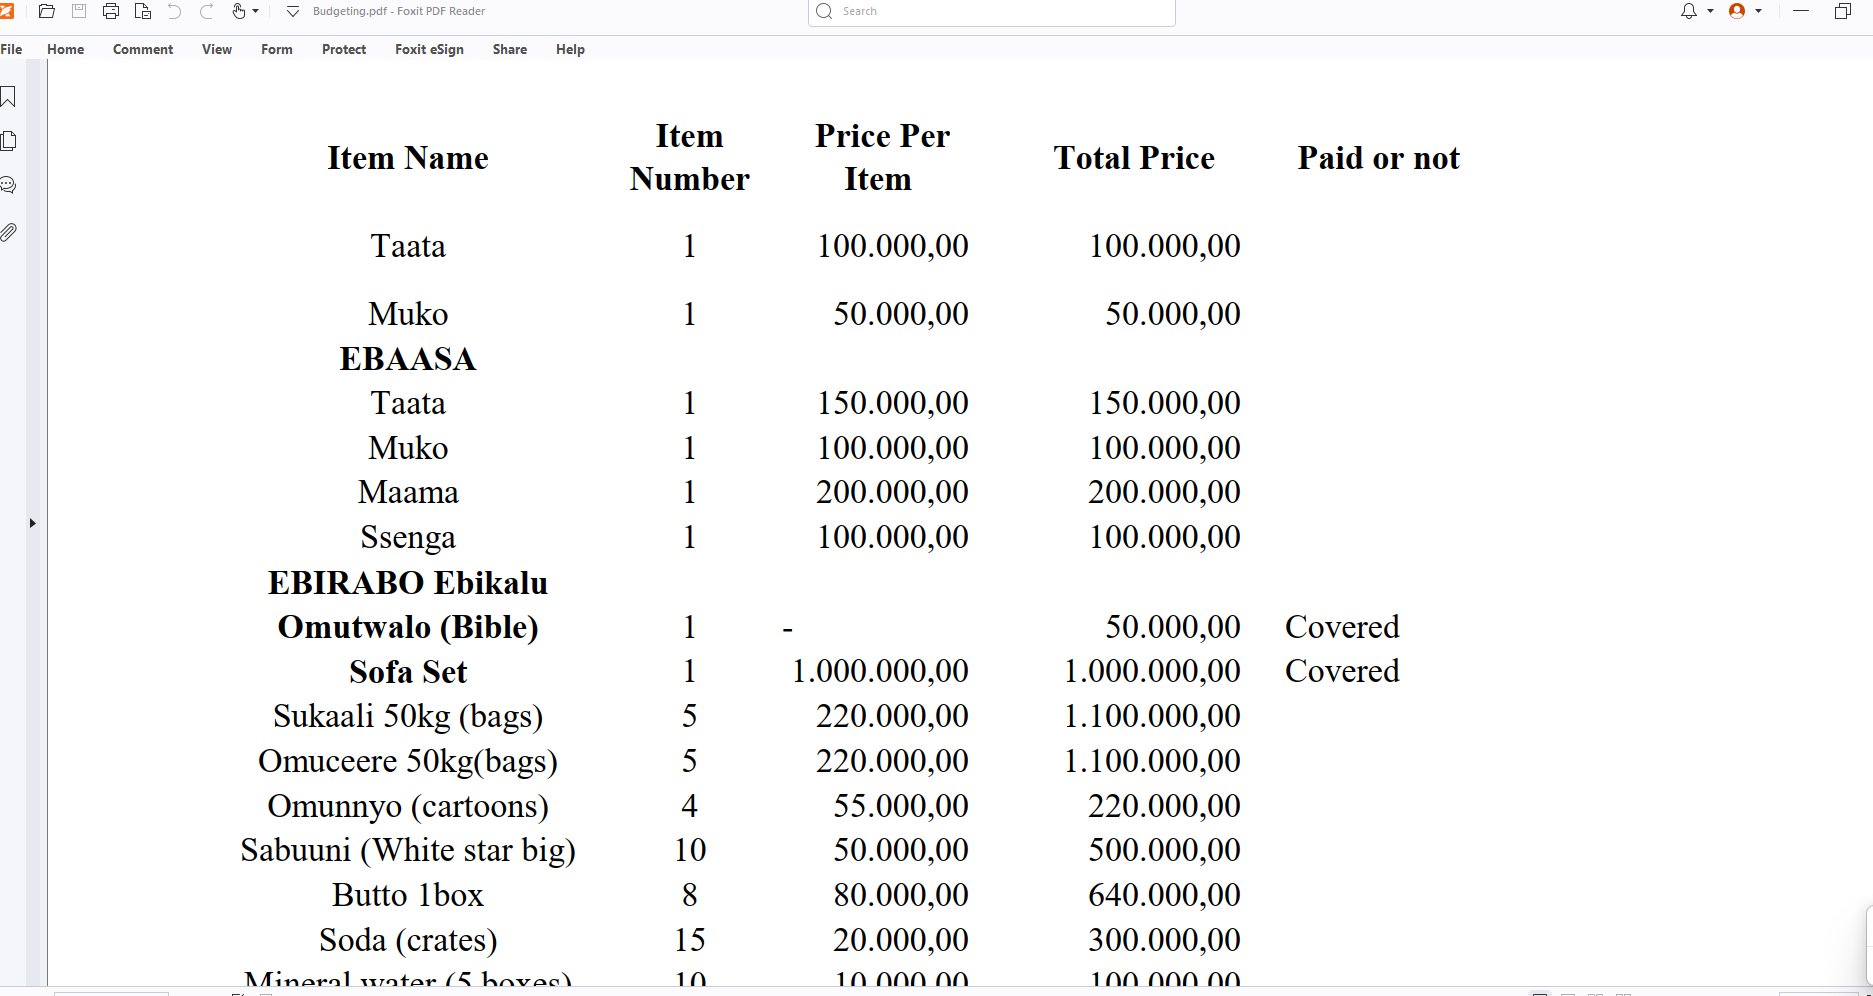

In [2]:
url = r'I:\Haus\Budgeting.png'
Image(url, width=500, height=700)
# A pictorial overview of the to be manipulated pdf 

In [3]:
def extract_text_from_pdf(pdf_path):# Extracting the corresponding pdf file from the stored folder
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = [page.extract_text() for page in reader.pages]
    return text

# Function to process text into a DataFrame
def process_text_to_df(text):
    lines = text.split('\n')
    data = []
    item_name = ""
    for line in lines:
        if line.strip():
            # Regular expression to match the line format with price details
            match = re.match(r"(.+?)\s+(\d+)\s+([\d.,]+)\s+([\d.,]+)\s*(Covered|Not Covered)?$", line)
            if match:
                item_description = match.group(1).strip()
                item_number = match.group(2).strip()
                price_per_item = match.group(3).strip().replace('.', ',')
                total_price = match.group(4).strip().replace('.', ',')
                paid_or_not = match.group(5) if match.group(5) else "Not Covered"
                if item_name:
                    item_description = item_name + " " + item_description
                    item_name = ""
                data.append([item_description, item_number, price_per_item, total_price, paid_or_not])
            else:
                item_name += " " + line if item_name else line

    return pd.DataFrame(data, columns=['Item Name', 'Item Number', 'Price Per Item', 'Total Price', 'Paid or not'])


def pdf_to_excel(pdf_path, excel_path): # I created this function to save the converted xlsx file . 
    text = ''.join(extract_text_from_pdf(pdf_path))
    df = process_text_to_df(text)
    df.to_excel(excel_path, index=False)

# Usage
pdf_path = 'I:\\Haus\\Budgeting.pdf' 
excel_path = 'I:\\Haus\\output.xlsx'
pdf_to_excel(pdf_path, excel_path)

In [4]:
## Reading the saved output.xlsx file 
output_df = pd.read_excel("I:\Haus\output.xlsx") 
output_df

,Item Name,Item Number,Price Per Item,Total Price,Paid or not
0,Item Name Item Number Price Per Item Total Pr...,1,"100,000,00","100,000,00",Not Covered
1,Muko,1,"50,000,00","50,000,00",Not Covered
2,EBAASA - - - Taata,1,"150,000,00","150,000,00",Not Covered
3,Muko,1,"100,000,00","100,000,00",Not Covered
4,Maama,1,"200,000,00","200,000,00",Not Covered
5,Ssenga,1,"100,000,00","100,000,00",Not Covered
6,EBIRABO Ebikalu Omutwalo (Bible) 1 - ...,1,"1,000,000,00","1,000,000,00",Not Covered
7,Sukaali 50kg (bags),5,"220,000,00","1,100,000,00",Not Covered
8,Omuceere 50kg(bags),5,"220,000,00","1,100,000,00",Not Covered
9,Omunnyo (cartoons),4,"55,000,00","220,000,00",Not Covered
